# Lesson 2 Demo 2: Creating Denormalized Tables

PostgreSQL Logo

### Walk through the basics of modeling data from normalized from to denormalized form. In this demo, we will: <br>
<ol><li>Create tables in PostgreSQL<li>Insert rows of data<li>Do simple JOIN SQL queries to show how these mutliple tables can work together. 

_Remember the examples shown are simple, but imagine these situations at scale with large datasets, many users, and the need for quick response time._

#### Import the library 
Note: An error might popup after this command has executed. If it does, read it carefully before ignoring. 

In [17]:
import psycopg2

Create a connection to the database, get a cursor, and set autocommit to true

In [18]:
try: 
    conn = psycopg2.connect("host=127.0.0.1 dbname=udacity user=postgres password=******")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get curser to the Database")
    print(e)
conn.set_session(autocommit=True)

#### Let's start with our normalized (3NF) database set of tables we had in the last exercise but we have added a new table song_length. 

`Table Name: album_library 
column 0: Album Id
column 1: Album Name
column 2: Artist Id
column 3: Year `

`Table Name: song_library
column 0: Song Id
column 1: Song Name
column 3: Album Id`

`Table Name: artist_library
column 0: Artist Id
column 1: Artist Name `

`Table Name: song_length
column 0: Song Id
column 1: Song length in seconds
`

Please refer to the table images in the video.
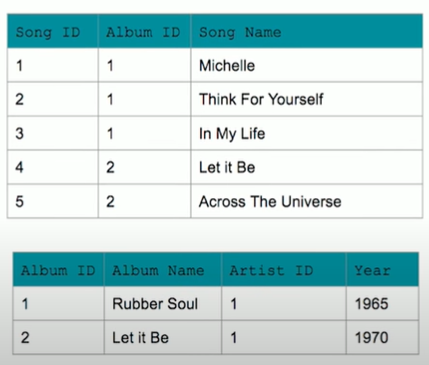

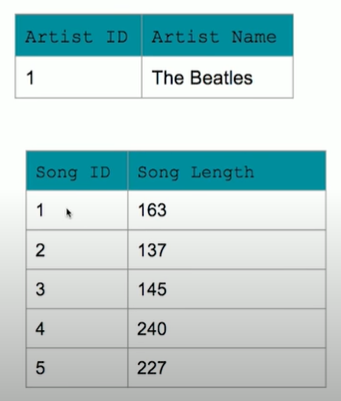

In [7]:
#Create all Tables
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS album_library (album_id int, \
                                                           album_name varchar, artist_id int, \
                                                           year int);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

try: 
    cur.execute("CREATE TABLE IF NOT EXISTS artist_library (artist_id int, \
                                                           artist_name varchar);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

try: 
    cur.execute("CREATE TABLE IF NOT EXISTS song_library (song_id int, album_id int, \
                                                          song_name varchar);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

try: 
    cur.execute("CREATE TABLE IF NOT EXISTS song_length (song_id int, song_length int);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
#Insert into all tables 

try: 
    cur.execute("INSERT INTO song_length (song_id, song_length) \
                 VALUES (%s, %s)", \
                 (1, 163))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO song_length (song_id, song_length) \
                 VALUES (%s, %s)", \
                 (2, 137))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO song_length (song_id, song_length) \
                 VALUES (%s, %s)", \
                 (3, 145))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO song_length (song_id, song_length) \
                 VALUES (%s, %s)", \
                 (4, 240))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO song_length (song_id, song_length) \
                 VALUES (%s, %s)", \
                 (5, 227))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
    
try: 
    cur.execute("INSERT INTO song_library (song_id, album_id, song_name) \
                 VALUES (%s, %s, %s)", \
                 (1, 1, "Michelle"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO song_library (song_id, album_id, song_name) \
                 VALUES (%s, %s, %s)", \
                 (2, 1, "Think For Yourself"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO song_library (song_id, album_id, song_name) \
                 VALUES (%s, %s, %s)", \
                 (3, 1, "In My Life"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO song_library (song_id, album_id, song_name) \
                 VALUES (%s, %s, %s)", \
                 (4, 2, "Let It Be"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO song_library (song_id, album_id, song_name) \
                 VALUES (%s, %s, %s)", \
                 (5, 2, "Across the Universe"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

    
try: 
    cur.execute("INSERT INTO album_library (album_id, album_name, artist_id, year) \
                 VALUES (%s, %s, %s, %s)", \
                 (1, "Rubber Soul", 1, 1965))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO album_library (album_id, album_name, artist_id, year) \
                 VALUES (%s, %s, %s, %s)", \
                 (2, "Let It Be", 1, 1970))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO artist_library (artist_id, artist_name) \
                 VALUES (%s, %s)", \
                 (1, "The Beatles"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    

#### Print results

In [8]:
print("Table: album_library\n")
try: 
    cur.execute("SELECT * FROM album_library;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

print("\nTable: song_library\n")
try: 
    cur.execute("SELECT * FROM song_library;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

print("\nTable: artist_library\n")
try: 
    cur.execute("SELECT * FROM artist_library;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

print("\nTable: song_length\n")
try: 
    cur.execute("SELECT * FROM song_length;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

Table: album_library

(1, 'Rubber Soul', 1, 1965)
(2, 'Let It Be', 1, 1970)

Table: song_library

(1, 1, 'Michelle')
(2, 1, 'Think For Yourself')
(3, 1, 'In My Life')
(4, 2, 'Let It Be')
(5, 2, 'Across the Universe')

Table: artist_library

(1, 'The Beatles')

Table: song_length

(1, 163)
(2, 137)
(3, 145)
(4, 240)
(5, 227)


#### Let's say we need to do a query that gives us:

`artist_id 
artist_name 
album_id 
album_name 
year 
song_id
song_name 
song_length` 

we will need to perform a 3 way `JOIN` on the 4 tables we have created. 

In [9]:
try: 
    cur.execute("SELECT artist_library.artist_id, artist_name, album_library.album_id, \
                        album_name, year, song_library.song_id, song_name, song_length\
                  FROM ((artist_library JOIN album_library ON \
                         artist_library.artist_id = album_library.artist_id) JOIN \
                         song_library ON album_library.album_id=song_library.album_id) JOIN\
                         song_length ON song_library.song_id=song_length.song_id;")
    
    
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

(1, 'The Beatles', 1, 'Rubber Soul', 1965, 1, 'Michelle', 163)
(1, 'The Beatles', 1, 'Rubber Soul', 1965, 2, 'Think For Yourself', 137)
(1, 'The Beatles', 1, 'Rubber Soul', 1965, 3, 'In My Life', 145)
(1, 'The Beatles', 2, 'Let It Be', 1970, 4, 'Let It Be', 240)
(1, 'The Beatles', 2, 'Let It Be', 1970, 5, 'Across the Universe', 227)


#### Great we were able to get the data we wanted.

But, we had to do a to 3 way `JOIN` to get there. While it's great we had that flexability, we need to remember that `JOINS` are slow and if we have a read heavy workload that required low latency queries we want to reduce the number of `JOINS`.  Let's think about denormalizing our normalized tables.

 With denormalization we want to think about the queries we are running and how we can reduce our number of JOINS, even if that means duplicating data 

#### Query 1 : `select artist_name, album_name, year, song_name, song_length FROM <min number of tables>` 
I want a list of all my songs
#### Query 2: `select album_name SUM(song_length) FROM <min number of tables> GROUP BY album_name` 
I want to know the length of each album in seconds 

####  Query 1: `select artist_name, album_name, year, song_name, song_length FROM <min number of tables>` 

To reduce the number of tables this is more straight forward. Let's first add `song_length` to the `song_library` table and `artist_name` to `album_library`. 

`Table Name: album_library 
column 0: Album Id
column 1: Album Name
column 2: Artist Name
column 3: Year `

`Table Name: song_library
column: Song Id
column: Album Id  
column: Song Name
column: Song Length`

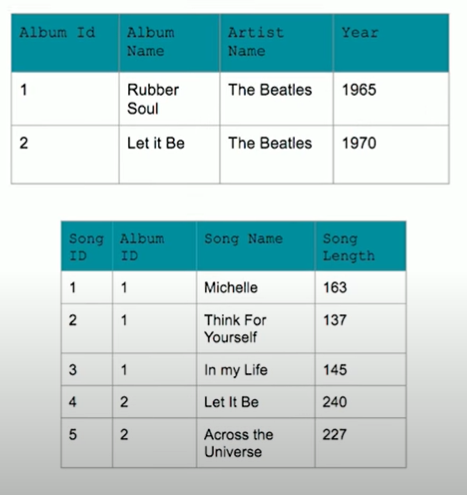


In [10]:
#Create all Tables
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS album_library1 (album_id int, \
                                                           album_name varchar, artist_name varchar, \
                                                           year int);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)


try: 
    cur.execute("CREATE TABLE IF NOT EXISTS song_library1 (song_id int, album_id int, \
                                                          song_name varchar, song_length int);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)


#Insert into all tables 
    
try: 
    cur.execute("INSERT INTO song_library1 (song_id, album_id, song_name, song_length) \
                 VALUES (%s, %s, %s, %s)", \
                 (2, 1, "Think For Yourself", 137 ))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO song_library1 (song_id, album_id, song_name, song_length) \
                 VALUES (%s, %s, %s, %s)", \
                 (3, 1, "In My Life", 145))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO song_library1 (song_id, album_id, song_name, song_length) \
                 VALUES (%s, %s, %s, %s)", \
                 (4, 2, "Let It Be", 240))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO song_library1 (song_id, album_id, song_name, song_length) \
                 VALUES (%s, %s, %s, %s)", \
                 (5, 2, "Across the Universe", 227))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

    
try: 
    cur.execute("INSERT INTO album_library1 (album_id, album_name, artist_name, year) \
                 VALUES (%s, %s, %s, %s)", \
                 (1, "Rubber Soul", "The Beatles", 1965))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO album_library1 (album_id, album_name, artist_name, year) \
                 VALUES (%s, %s, %s, %s)", \
                 (2, "Let It Be", "The Beatles", 1970))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

### Great we can now do a simplifed query to get the information we need. Only one `JOIN` is needed.

In [11]:
try: 
    cur.execute("SELECT artist_name, album_name, year, song_name, song_length\
                  FROM song_library1 JOIN album_library1 ON \
                        song_library1.album_id = album_library1.album_id;")
        
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

('The Beatles', 'Rubber Soul', 1965, 'Think For Yourself', 137)
('The Beatles', 'Rubber Soul', 1965, 'In My Life', 145)
('The Beatles', 'Let It Be', 1970, 'Let It Be', 240)
('The Beatles', 'Let It Be', 1970, 'Across the Universe', 227)


#### Query 2: `select album_name SUM(song_length) FROM <min number of tables> GROUP BY album_name` 

We could also do a `JOIN` on the tables we have created, but what if we do not want to have any `JOINS`, why not create a new table with just the information we need. 

`Table Name: album_length
col: Song Id
Col: Album Id
col: Song Length
`

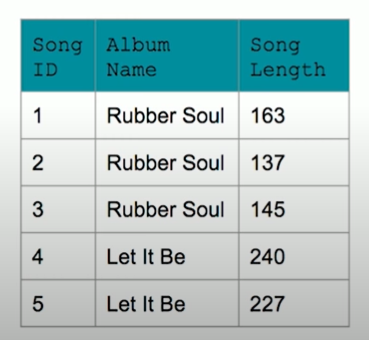


In [12]:
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS album_length (song_id int, album_name varchar, \
                                                          song_length int);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)


#Insert into all tables 
    
try: 
    cur.execute("INSERT INTO album_length (song_id, album_name, song_length) \
                 VALUES (%s, %s, %s)", \
                 (1, "Rubber Soul", 163 ))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO album_length (song_id, album_name, song_length) \
                 VALUES (%s, %s, %s)", \
                 (2, "Rubber Soul", 137 ))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)   

try: 
    cur.execute("INSERT INTO album_length (song_id, album_name, song_length) \
                 VALUES (%s, %s, %s)", \
                 (3, "Rubber Soul", 145 ))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)   

try: 
    cur.execute("INSERT INTO album_length (song_id, album_name, song_length) \
                 VALUES (%s, %s, %s)", \
                 (4, "Let It Be", 240 ))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e) 
    
try: 
    cur.execute("INSERT INTO album_length (song_id, album_name, song_length) \
                 VALUES (%s, %s, %s)", \
                 (5, "Let It Be", 227 ))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e) 

#### Now let's run our query

In [13]:
try: 
    cur.execute("SELECT album_name, SUM(song_length) FROM album_length GROUP BY album_name;")
        
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

('Rubber Soul', 445)
('Let It Be', 467)


#### We have successfully taken normalized table and denormalized them inorder to speed up our performance and allow for simplier queries to be executed. 

### For the sake of the demo, I will drop the tables. 

In [14]:
try: 
    cur.execute("DROP table song_library")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table album_library")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table artist_library")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table song_length")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table song_library1")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table album_library1")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table album_length")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)

### And finally close your cursor and connection. 

In [16]:
cur.close()
conn.close()